Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

My Dataset:
id,title,author,text,label

0:Real
1:Fake





In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Data Pre-processing

In [ ]:
news_dataset = pd.read_csv('/content/train.csv')

In [ ]:
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
news_dataset = news_dataset.fillna('')

In [ ]:
news_dataset['merged'] = news_dataset['author']+' '+news_dataset['title']

In [ ]:
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']

In [ ]:
ps = PorterStemmer()

In [ ]:
def stemming(merged):
    stemmed_merged = re.sub('[^a-zA-Z]',' ',merged)
    stemmed_merged = stemmed_merged.lower()
    stemmed_merged = stemmed_merged.split()
    stemmed_merged = [ps.stem(word) for word in stemmed_merged if not word in stopwords.words('english')]
    stemmed_merged = ' '.join(stemmed_merged)
    return stemmed_merged

In [ ]:
news_dataset['merged'] = news_dataset['merged'].apply(stemming)

In [ ]:
X = news_dataset['merged'].values
Y = news_dataset['label'].values

In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

Training the Model: Naive Bayes



In [ ]:
nb_model = MultinomialNB()

In [ ]:
nb_model.fit(X_train, Y_train)

MultinomialNB()

In [ ]:
nb_model.fit(X_train, Y_train)

MultinomialNB()

Naive Bayes Training Data

In [ ]:
nb_train_prediction = nb_model.predict(X_train)
nb_training_data_accuracy = accuracy_score(nb_train_prediction, Y_train)

In [ ]:
print('Naive Bayes - Accuracy score of the training data:', nb_training_data_accuracy)

Naive Bayes - Accuracy score of the training data: 0.9782451923076924


Naive Bayes Test Data

In [ ]:
nb_test_prediction = nb_model.predict(X_test)
nb_test_data_accuracy = accuracy_score(nb_test_prediction, Y_test)
print('Naive Bayes - Accuracy score of the test data:', nb_test_data_accuracy)

Naive Bayes - Accuracy score of the test data: 0.9550480769230769


In [ ]:
svm_model = SVC()
svm_model.fit(X_train, Y_train)

SVC()

SVM Training Data

In [ ]:
svm_train_prediction = svm_model.predict(X_train)
svm_training_data_accuracy = accuracy_score(svm_train_prediction, Y_train)
print('SVM - Accuracy score of the training data:', svm_training_data_accuracy)

SVM - Accuracy score of the training data: 0.9990985576923077


SVM Test Data

In [ ]:
svm_test_prediction = svm_model.predict(X_test)
svm_test_data_accuracy = accuracy_score(svm_test_prediction, Y_test)
print('SVM - Accuracy score of the test data:', svm_test_data_accuracy)

SVM - Accuracy score of the test data: 0.9889423076923077


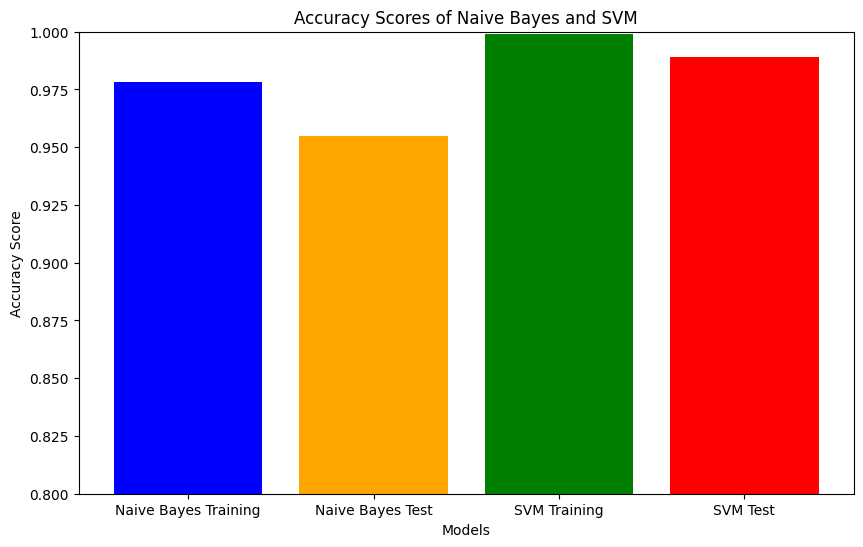

In [ ]:
accuracy_scores = [nb_training_data_accuracy, nb_test_data_accuracy, svm_training_data_accuracy, svm_test_data_accuracy]

labels = ['Naive Bayes Training', 'Naive Bayes Test', 'SVM Training', 'SVM Test']

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, accuracy_scores, color=['blue', 'orange', 'green', 'red'])
plt.title('Accuracy Scores of Naive Bayes and SVM')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.ylim(0.8, 1)  # Set y-axis limits for better visualization
plt.show()

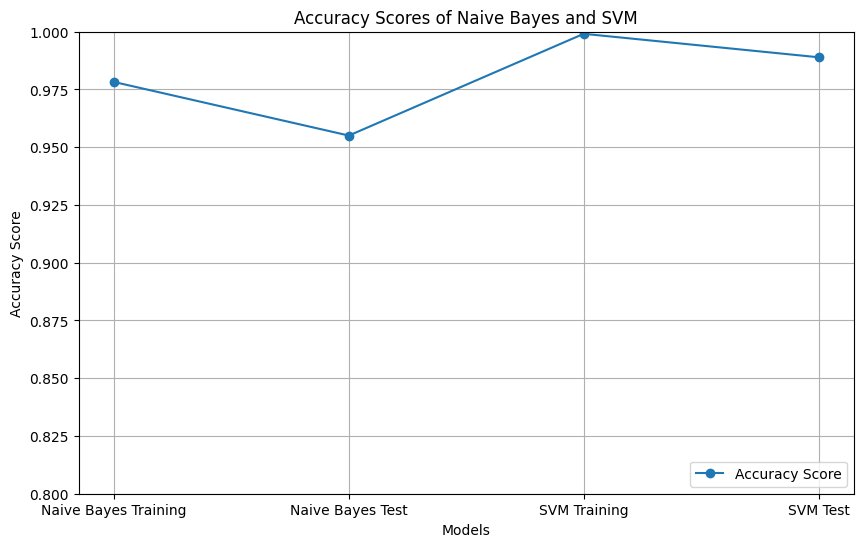

In [ ]:
accuracy_scores = [nb_training_data_accuracy, nb_test_data_accuracy, svm_training_data_accuracy, svm_test_data_accuracy]

plt.figure(figsize=(10, 6))
plt.plot(labels, accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracy Scores of Naive Bayes and SVM')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.ylim(0.8, 1)  # Set y-axis limits for better visualization
plt.grid(True)  # Add grid for better readability
plt.legend(['Accuracy Score'], loc='lower right')
plt.show()